**To Predict Diabetis using PIMA diabetes data**

**Importing libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
data = pd.read_csv(r'C:\Users\kiran\Desktop\Bhaskar\ml_projects\PIMA_diabetes_Classifier\pima-data.csv')

In [4]:
data.shape

(768, 10)

In [5]:
data.head(5)

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age    skin  diabetes  
0   50  1.3790      True  
1   31  1.1426     False  
2   32  0.0000      True  
3   21  0.9062     False  
4   33  1.3790      True

In [6]:
data.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


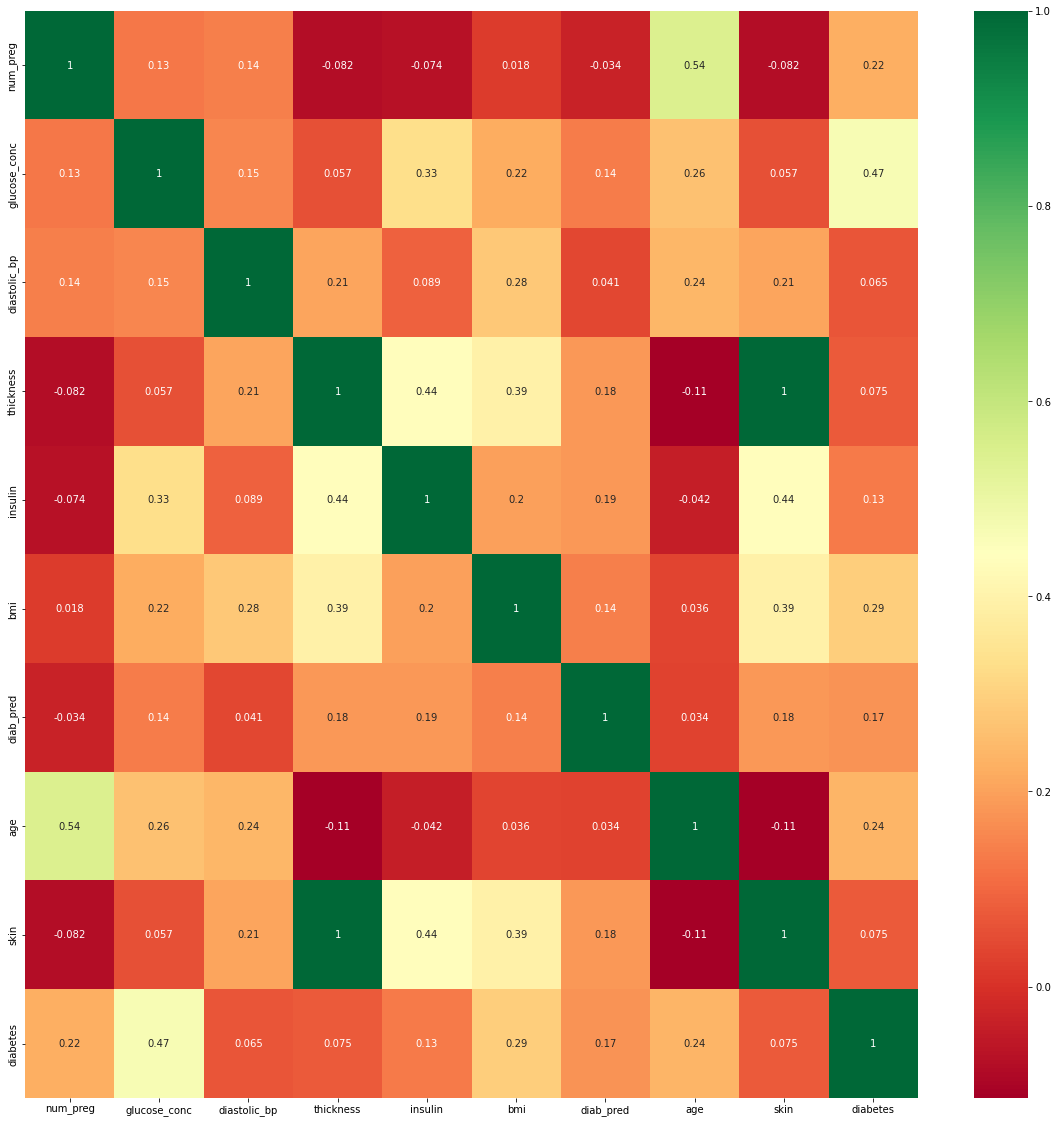

In [12]:
# Find the correlarion in our features
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
# plot heat map
g = sns.heatmap(data[top_corr_features].corr(),annot = True,cmap = "RdYlGn")

In [13]:
data.corr()

num_preg  glucose_conc  diastolic_bp  thickness   insulin  \
num_preg      1.000000      0.129459      0.141282  -0.081672 -0.073535   
glucose_conc  0.129459      1.000000      0.152590   0.057328  0.331357   
diastolic_bp  0.141282      0.152590      1.000000   0.207371  0.088933   
thickness    -0.081672      0.057328      0.207371   1.000000  0.436783   
insulin      -0.073535      0.331357      0.088933   0.436783  1.000000   
bmi           0.017683      0.221071      0.281805   0.392573  0.197859   
diab_pred    -0.033523      0.137337      0.041265   0.183928  0.185071   
age           0.544341      0.263514      0.239528  -0.113970 -0.042163   
skin         -0.081672      0.057328      0.207371   1.000000  0.436783   
diabetes      0.221898      0.466581      0.065068   0.074752  0.130548   

                   bmi  diab_pred       age      skin  diabetes  
num_preg      0.017683  -0.033523  0.544341 -0.081672  0.221898  
glucose_conc  0.221071   0.137337  0.263514  0.057328  0.466581  
diastolic_bp  0.281805   0.041265  0.239528  0.207371  0.065068  
thickness     0.392573   0.183928 -0.113970  1.000000  0.074752  
insulin       0.197859   0.185071 -0.042163  0.436783  0.130548  
bmi           1.000000   0.140647  0.036242  0.392573  0.292695  
diab_pred     0.140647   1.000000  0.033561  0.183928  0.173844  
age           0.036242   0.033561  1.000000 -0.113970  0.238356  
skin          0.392573   0.183928 -0.113970  1.000000  0.074752  
diabetes      0.292695   0.173844  0.238356  0.074752  1.000000

**Changing the diabetes column data from boolean to number**

In [14]:
diabetes_map = {True : 1, False :0}

In [15]:
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [16]:
data

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  \
0           6           148            72         35        0  33.6   
1           1            85            66         29        0  26.6   
2           8           183            64          0        0  23.3   
3           1            89            66         23       94  28.1   
4           0           137            40         35      168  43.1   
..        ...           ...           ...        ...      ...   ...   
763        10           101            76         48      180  32.9   
764         2           122            70         27        0  36.8   
765         5           121            72         23      112  26.2   
766         1           126            60          0        0  30.1   
767         1            93            70         31        0  30.4   

     diab_pred  age    skin  diabetes  
0        0.627   50  1.3790         1  
1        0.351   31  1.1426         0  
2        0.672   32  0.0000         1  
3        0.167   21  0.9062         0  
4        2.288   33  1.3790         1  
..         ...  ...     ...       ...  
763      0.171   63  1.8912         0  
764      0.340   27  1.0638         0  
765      0.245   30  0.9062         0  
766      0.349   47  0.0000         1  
767      0.315   23  1.2214         0  

[768 rows x 10 columns]

In [19]:
data['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [20]:
# This looks like some what inbalanced data science , but for this example , we would do proceed**

In [42]:
list(data.columns)

['num_preg',
 'glucose_conc',
 'diastolic_bp',
 'thickness',
 'insulin',
 'bmi',
 'diab_pred',
 'age',
 'skin',
 'diabetes']

In [45]:
# Train Test Split
from sklearn.model_selection import train_test_split
feature_columns = ['num_preg',
 'glucose_conc',
 'diastolic_bp',
 'insulin',
 'bmi',
 'diab_pred',
 'age',
 'skin']
predicted_class = ['diabetes']

In [51]:
# convert  the values from dataframe to  array of list of lists
x = data[feature_columns].values
y = data[predicted_class].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 10)

In [ ]:
# in the columns there are several values which are 0's .This should not be that case
# for that we have to replace the 0's with the meanof that particular columns.
#For that we use imputer

x_train,x_test,y_train,y_test

In [89]:
data

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  \
0           6           148            72         35        0  33.6   
1           1            85            66         29        0  26.6   
2           8           183            64          0        0  23.3   
3           1            89            66         23       94  28.1   
4           0           137            40         35      168  43.1   
..        ...           ...           ...        ...      ...   ...   
763        10           101            76         48      180  32.9   
764         2           122            70         27        0  36.8   
765         5           121            72         23      112  26.2   
766         1           126            60          0        0  30.1   
767         1            93            70         31        0  30.4   

     diab_pred  age    skin  diabetes  
0        0.627   50  1.3790         1  
1        0.351   31  1.1426         0  
2        0.672   32  0.0000         1  
3        0.167   21  0.9062         0  
4        2.288   33  1.3790         1  
..         ...  ...     ...       ...  
763      0.171   63  1.8912         0  
764      0.340   27  1.0638         0  
765      0.245   30  0.9062         0  
766      0.349   47  0.0000         1  
767      0.315   23  1.2214         0  

[768 rows x 10 columns]

In [90]:
from sklearn.impute import SimpleImputer
# prepare the function to specify what values (missing_Value) should be replaced by what(strategy)
fill_values = SimpleImputer(missing_values = 0,strategy = "mean")
# Apply the imputer function to test,train split
x_train = fill_values.fit_transform(x_train)
x_test = fill_values.fit_transform(x_test)


In [91]:
data

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  \
0           6           148            72         35        0  33.6   
1           1            85            66         29        0  26.6   
2           8           183            64          0        0  23.3   
3           1            89            66         23       94  28.1   
4           0           137            40         35      168  43.1   
..        ...           ...           ...        ...      ...   ...   
763        10           101            76         48      180  32.9   
764         2           122            70         27        0  36.8   
765         5           121            72         23      112  26.2   
766         1           126            60          0        0  30.1   
767         1            93            70         31        0  30.4   

     diab_pred  age    skin  diabetes  
0        0.627   50  1.3790         1  
1        0.351   31  1.1426         0  
2        0.672   32  0.0000         1  
3        0.167   21  0.9062         0  
4        2.288   33  1.3790         1  
..         ...  ...     ...       ...  
763      0.171   63  1.8912         0  
764      0.340   27  1.0638         0  
765      0.245   30  0.9062         0  
766      0.349   47  0.0000         1  
767      0.315   23  1.2214         0  

[768 rows x 10 columns]

In [94]:
##Apply Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state = 10)
random_forest_model.fit(x_train,y_train.ravel())

RandomForestClassifier(random_state=10)

In [95]:
predict_train_data = random_forest_model.predict(x_test)

from sklearn import metrics
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test,predict_train_data)))

Accuracy = 0.736


**Hyperparameter tuning**

In [106]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [107]:
# Hyperparamete optimization using RandomizedsearchCV

from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [108]:
classifier = xgboost.XGBClassifier()

In [109]:
random_search = RandomizedSearchCV(classifier,param_distributions = params,n_iter = 5,scoring = 'roc_auc',n_jobs = -1,cv = 5,verbose = 3)

In [110]:
random_search.fit(x_train,y_train.ravel())

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[15:58:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [111]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

**Copying the paramters of the best estimator and create a new classifier**

In [117]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

**Perform the cross validation on the data to get average mean accuracy**

In [118]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,x_train,y_train.ravel(),cv = 10)
score

C:\Users\kiran\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:20:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:20:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\kiran\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.74074074, 0.85185185, 0.77777778, 0.75925926, 0.68518519,
       0.72222222, 0.87037037, 0.66037736, 0.81132075, 0.79245283])

In [119]:
score.mean()

0.7671558350803634

**Prediction on test data**

In [123]:
classifier.fit(x_train,y_train)

[16:26:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kiran\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\kiran\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [125]:
y_pred = classifier.predict(x_test)

In [126]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print(cm)
print(score)

[[124  20]
 [ 35  52]]
0.7619047619047619
